In [38]:
import numpy as np
import matplotlib.pyplot as plt
from second_excercise import model_training, model, load_data, display_pet, normalize_and_flat

In [9]:
# load dataset from h5py files
dataset, expected, dataset_test, expected_test = load_data()
dataset.shape, expected.shape, dataset_test.shape, expected_test.shape

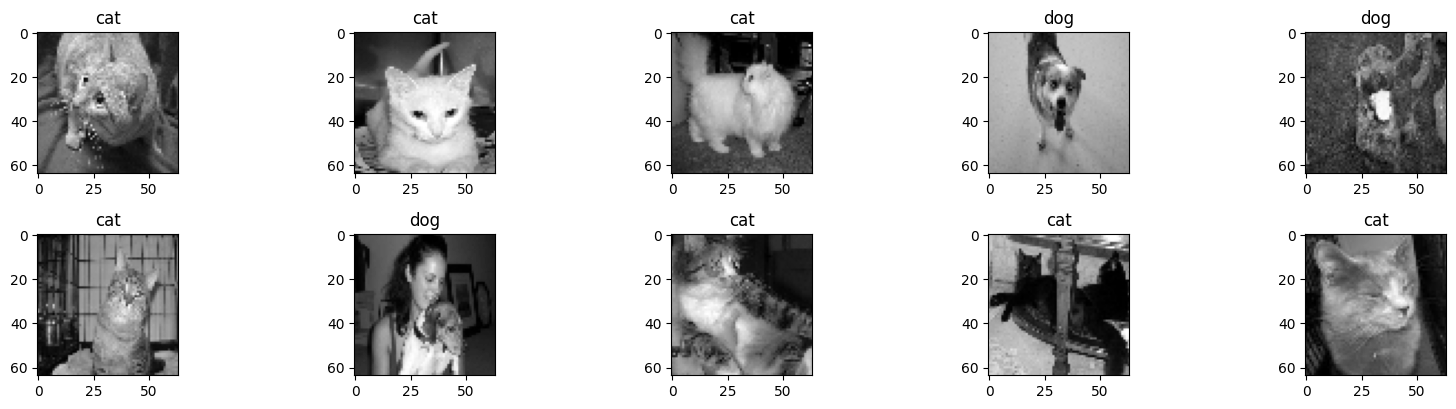

In [11]:
# display 10 first pictures
plt.figure(figsize=(16, 8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(dataset[i], cmap="gray")
    plt.title(display_pet(expected[i][0]))
    plt.tight_layout()
plt.show()

In [17]:
# flatten datasets
flatten = normalize_and_flat(dataset)
flatten_test = normalize_and_flat(dataset_test)
flatten.shape, flatten_test.shape

((1000, 4096), (200, 4096))

In [39]:
# model training
weights, bias, loss, acc, loss_test, acc_test = model_training(flatten, expected, flatten_test, expected_test, 0.01, 10000)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [02:02<00:00, 81.57it/s]


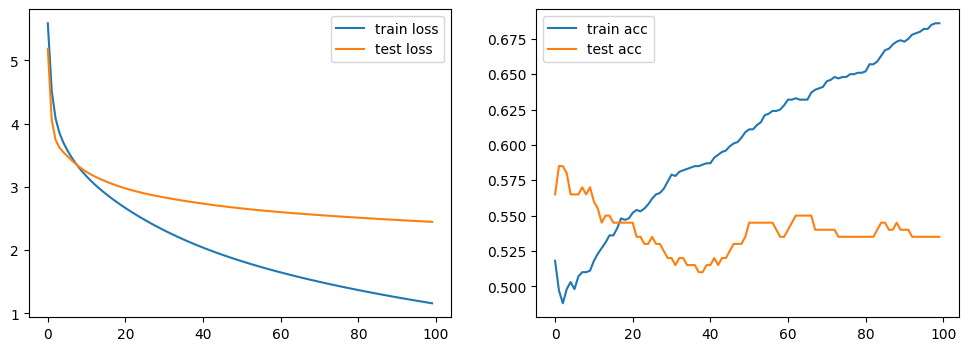

In [41]:
# display training curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label="train loss")
plt.plot(loss_test, label="test loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc, label="train acc")
plt.plot(acc_test, label="test acc")
plt.legend()
plt.show()

In [44]:
# Le modèle actuel, avec un seul neurone, n'est pas adapté à ce problème de tri d'image.
# On s'apperçoit que la courbe "test loss" est clairement en décalage avec la courbe "train loss"
# De plus, on s'apperçoit également que la courbe "train acc" continue de grimper, contrairement à celle du test
# qui reste faible. Le modèle n'arrive pas à "généraliser".
# Pour résoudre ce problème il faut un réseau de neurones et non un seul.